# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [7]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [8]:
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,329.00,1
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,481.04,9
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,17.74,14


## 1.2 preprocessing of `project_subject_categories`

In [9]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.2.1 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

#sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))
#sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))
#sorted_project_grade_dict = dict(sorted(project_grade_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of project_grade_category

In [11]:
sub_catogories = list(project_data['project_grade_category'].values)
project_grade_list = []
for i in sub_catogories:
    temp = i.replace('-','_')
    temp = temp.replace(' ','_')
    project_grade_list.append(temp.strip())
project_data['project_grade_category'] = project_grade_list

In [12]:
print(project_data['project_grade_category'].values)

['Grades_PreK_2' 'Grades_3_5' 'Grades_PreK_2' ... 'Grades_3_5'
 'Grades_9_12' 'Grades_PreK_2']


## 1.4 Text preprocessing

In [13]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades_PreK_2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades_3_5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [15]:
print(project_data['essay'].values[99999])
print("="*50)

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [16]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [18]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [19]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [20]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [21]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [01:54<00:00, 953.47it/s]


In [22]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

## 1.4 Preprocessing of `project_title`

In [23]:
# similarly you can preprocess the titles also
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 19071.39it/s]


In [24]:
preprocessed_title[1000]

'empowering students art learning'

## 1.5 Split the data into Train, CV and Test


#### 1.5.1 Data preparation on dataframe 

In [25]:
y = project_data['project_is_approved'].values
X = project_data
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades_PreK_2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...


#### 1.5.2 Split data into Train, Test and CV

In [26]:
# train test split
from sklearn.model_selection import train_test_split

X = X.fillna(X['teacher_prefix'].value_counts().index[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

#Data is not splitting to CV Since I am using gridsearchCV in this assignment
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [27]:
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades_PreK_2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...


### 1.6 Creating a Datamatrix

#### 1.6.1 Text features: Essay

##### 1.6.1.1 Text features: Essay_bow

In [28]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=3000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


(73196, 20) (73196,)
(36052, 20) (36052,)
After vectorizations
(73196, 3000) (73196,)
(36052, 3000) (36052,)


##### 1.6.1.2 Text features: TFIDF

In [29]:
feature_names_tfidf = []

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'])
X_test_essay_tfidf = vectorizer.transform(X_test['essay'])

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 14802) (73196,)
(36052, 14802) (36052,)


##### 1.6.1.3 Text features: AVGW2V

In [31]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [32]:
# average Word2Vec
# compute average word2vec for each review.
##############################################

avg_w2v_vector_X_Train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_Train_essay.append(vector)
####################################################

100%|██████████████████████████████████████████████████████████████████████████| 73196/73196 [00:45<00:00, 1618.25it/s]


In [33]:
avg_w2v_vector_X_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_test_essay.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:28<00:00, 1273.79it/s]


##### 1.6.1.4 Text features: TFIDF AVGW2V

In [34]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [35]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train_essay.append(vector)

print(len(tfidf_w2v_vectors_X_train_essay))
print(len(tfidf_w2v_vectors_X_train_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [08:45<00:00, 139.29it/s]


73196
300


In [36]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test_essay.append(vector)

print(len(tfidf_w2v_vectors_X_test_essay))
print(len(tfidf_w2v_vectors_X_test_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [05:07<00:00, 117.30it/s]


36052
300


#### 1.6.2 Text features: Project Title

##### 1.6.2.1 Text features: Project Title_BOW

In [37]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=3000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_bow = vectorizer.transform(X_train['project_title'].values)
X_test_project_bow = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_project_bow.shape, y_train.shape)
print(X_test_project_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 3000) (73196,)
(36052, 3000) (36052,)


##### 1.6.1.2 Text features: TFIDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_tdidf = vectorizer.transform(X_train['project_title'])
X_test_project_tfidf = vectorizer.transform(X_test['project_title'])

print("After vectorizations")
print(X_train_project_tdidf.shape, y_train.shape)
print(X_test_project_tfidf.shape, y_test.shape)
print("="*100)

feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 2666) (73196,)
(36052, 2666) (36052,)


##### 1.6.1.3 Text features: AVGW2V

In [39]:
# average Word2Vec
# compute average word2vec for each review.
##############################################

avg_w2v_vector_X_Train_Title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_Train_Title.append(vector)
####################################################

100%|█████████████████████████████████████████████████████████████████████████| 73196/73196 [00:00<00:00, 73534.47it/s]


In [40]:
avg_w2v_vector_X_test_Title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_test_Title.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 56980.81it/s]


##### 1.6.1.4 Text features: TFIDF_AVGW2V

In [41]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [42]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train_title.append(vector)

print(len(tfidf_w2v_vectors_X_train_title))
print(len(tfidf_w2v_vectors_X_train_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 73196/73196 [00:02<00:00, 32096.35it/s]


73196
300


In [43]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test_Title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test_Title.append(vector)

print(len(tfidf_w2v_vectors_X_test_Title))
print(len(tfidf_w2v_vectors_X_test_Title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 30333.33it/s]


36052
300


#### Response Code 

In [44]:
# Copied Code from Cancer prediction assignment & Updated code to work for this assignment
from IPython.core.debugger import set_trace
import pdb
def get_fea_dict(feature, df):
   
    value_count = train_df[feature].value_counts()   
    # gv_dict : Gene Variation Dict, which contains the probability array for each feature
    #print("At get_feature_dictionary ", value_count)
    fea_dict = dict()
    #pdb.set_trace()
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of feature belongs to perticular class
        # vec is 2 diamensional vector
        #print("value of i, denominator", i, denominator)
        vec = []
        for k in range(0,2):
            cls_cnt = train_df.loc[(train_df['project_is_approved']==k) & (train_df[feature]==i)]
            vec.append((cls_cnt.shape[0])/ (denominator))
            #print("Class count", cls_cnt.shape[0])
            #print("Vector value ", vec)
            #pdb.set_trace()
        # we are adding the gene/variation to the dict as key and vec as value
        fea_dict[i]=vec
    return fea_dict


In [45]:
def get_feature(feature, df):
    fea_dict = get_fea_dict(feature, df)
    value_count = train_df[feature].value_counts()
    #print("At get_feature call")
    ret_fea = []
    #pdb.set_trace()
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/2,1/2] to gv_fea
    for index, row in df.iterrows():
        #print("value of index, row, df", index, row, df)
        if row[feature] in dict(value_count).keys():
            ret_fea.append(fea_dict[row[feature]])
        else:
            ret_fea.append([1/2,1/2])
        #pdb.set_trace()
    return ret_fea

In [46]:
train_df = X_train
test_df = X_test

#### 1.6.3 catogorical features: state

In [47]:
X_train_state_RC = np.array(get_feature("school_state", X_train))
X_test_state_RC = np.array(get_feature("school_state", X_test))

In [48]:
print("X_train_state_RC is converted feature using respone coding method. The shape of school_state feature:", X_train_state_RC.shape)

X_train_state_RC is converted feature using respone coding method. The shape of school_state feature: (73196, 2)


#### 1.6.4 catogorical features: tearcher_prefix

In [49]:
X_train_teacher_RC = np.array(get_feature("teacher_prefix", X_train))
X_test_teacher_RC = np.array(get_feature("teacher_prefix", X_test))

print("X_train_teacher_RC is converted feature using respone coding method. The shape of teacher_prefix feature:", X_train_teacher_RC.shape)

X_train_teacher_RC is converted feature using respone coding method. The shape of teacher_prefix feature: (73196, 2)




#### 1.6.5 catogorical features: project_grade_category

In [50]:
X_train_grade_RC = np.array(get_feature("project_grade_category", X_train))
X_test_grade_RC = np.array(get_feature("project_grade_category", X_test))

print("X_train_grade_RC is converted feature using respone coding method. The shape of project_grade_category feature:", X_train_grade_RC.shape)


X_train_grade_RC is converted feature using respone coding method. The shape of project_grade_category feature: (73196, 2)


#### 1.6.6 catogorical features: clean_categories

In [51]:
X_train_CC_RC = np.array(get_feature("clean_categories", X_train))
X_test_CC_RC = np.array(get_feature("clean_categories", X_test))

print("X_train_CC_RC is converted feature using respone coding method. The shape of clean_categories feature:", X_train_CC_RC.shape)

X_train_CC_RC is converted feature using respone coding method. The shape of clean_categories feature: (73196, 2)


#### 1.6.7 catogorical features: clean_subcategories

In [52]:

X_train_SC_RC = np.array(get_feature("clean_subcategories", X_train))
X_test_SC_RC = np.array(get_feature("clean_subcategories", X_test))

print("X_train_SC_RC is converted feature using respone coding method. The shape of clean_subcategories feature:", X_train_SC_RC.shape)


X_train_SC_RC is converted feature using respone coding method. The shape of clean_subcategories feature: (73196, 2)


In [53]:
print("X_test_SC_RC is converted feature using respone coding method. The shape of clean_subcategories feature:", X_test_SC_RC.shape)

X_test_SC_RC is converted feature using respone coding method. The shape of clean_subcategories feature: (36052, 2)


#### 1.6.8 Normalizing the numerical features: Price

In [54]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

In [55]:
print(X_train_price_norm)
print(X_test_price_norm)

[[0.00128262]
 [0.00346144]
 [0.00042181]
 ...
 [0.00222642]
 [0.00179617]
 [0.00014288]]
[[0.00339461]
 [0.00415712]
 [0.00011571]
 ...
 [0.00376403]
 [0.00178161]
 [0.00271802]]


#### 1.6.9 Normalizing the numerical features: teacher_number_of_previously_posted_projects

In [56]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previously_posted_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")

X_train_previously_posted_norm = X_train_previously_posted_norm.reshape(-1,1)
X_test_previously_posted_norm = X_test_previously_posted_norm.reshape(-1,1)

print(X_train_previously_posted_norm.shape, y_train.shape)
print(X_test_previously_posted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [57]:
print(X_train_previously_posted_norm)
print(X_test_previously_posted_norm)

[[0.02338929]
 [0.00012441]
 [0.00124411]
 ...
 [0.00024882]
 [0.00087088]
 [0.00012441]]
[[0.00017336]
 [0.00832124]
 [0.00884132]
 ...
 [0.00017336]
 [0.        ]
 [0.00294711]]


# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.4 Applying Random Forest</h2>

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [58]:
print(X_test_essay_bow.shape)
print(X_test_essay_bow.shape)
print(X_test_project_bow.shape)
print(X_test_state_RC.shape)
print(X_test_teacher_RC.shape)
print(X_test_grade_RC.shape)
print(X_test_CC_RC.shape)
print(X_test_SC_RC.shape)
print(X_test_price_norm.shape)
print(X_test_previously_posted_norm.shape)

(36052, 3000)
(36052, 3000)
(36052, 3000)
(36052, 2)
(36052, 2)
(36052, 2)
(36052, 2)
(36052, 2)
(36052, 1)
(36052, 1)


In [59]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_BOW = hstack((X_train_essay_bow,X_train_project_bow,X_train_state_RC,X_train_teacher_RC,X_train_grade_RC,X_train_CC_RC,X_train_SC_RC,X_train_price_norm,X_train_previously_posted_norm)).tocsr()
X_te_BOW = hstack((X_test_essay_bow,X_test_project_bow, X_test_state_RC,X_test_teacher_RC,X_test_grade_RC, X_test_CC_RC,X_test_SC_RC, X_test_price_norm, X_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(X_tr_BOW.shape, y_train.shape)
print(X_te_BOW.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 6012) (73196,)
(36052, 6012) (36052,)


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Base_Model = RandomForestClassifier(criterion='gini',class_weight='balanced')
parameters = [{'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100]}]
grid_search_BOW = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1, return_train_score= True)
grid_search_BOW = grid_search_BOW.fit(X_tr_BOW, y_train)

In [60]:
#Plot heat map for Confusion matrix
# Taken Reference from https://www.kaggle.com/arindambanerjee/grid-search-simplified
def Plot_Heatmap(grid_search):
    max_depth_list = list(grid_search.cv_results_['param_max_depth'].data)
    estimators_list = list(grid_search.cv_results_['param_n_estimators'].data)
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':grid_search.cv_results_['mean_train_score']})
    data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
    sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
    plt.subplot(1,2,2)
    data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':grid_search.cv_results_['mean_test_score']})
    data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
    sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
    plt.show()

In [61]:
#Choosing the best hyperparameters which are obtained from grid search

def Chose_Best_Hyperparam(Depth, No_Estimators, X_train, X_test):
    
    Base_Model = RandomForestClassifier(criterion='gini', max_depth=Depth, n_estimators=No_Estimators, class_weight='balanced')
    Base_Model.fit(X_train, y_train)
    y_train_pred = Base_Model.predict_proba(X_train)[:,1]    
    y_test_pred = Base_Model.predict_proba(X_test)[:,1]

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("Alpha: hyperparameter")
    plt.ylabel("AUC")
    plt.title("Alpha: hyperparameter vs AUC")
    plt.grid()
    plt.show()
    Output = (y_train_pred,y_test_pred,train_fpr,train_tpr,tr_thresholds,test_fpr,test_tpr,te_thresholds,Base_Model)
    return Output

In [62]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [64]:
grid_search_BOW.best_params_

{'max_depth': 10, 'n_estimators': 100}

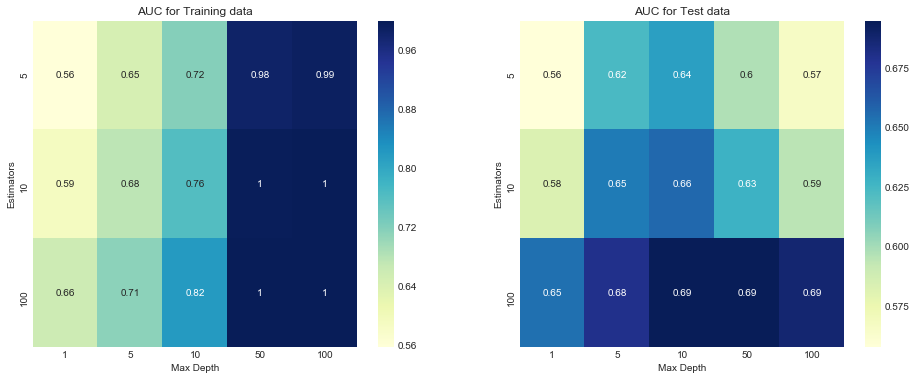

In [65]:
Plot_Heatmap(grid_search_BOW)

In [66]:
#Chosen best hyper parameter from heat map
Depth =  10
Esimators = 100

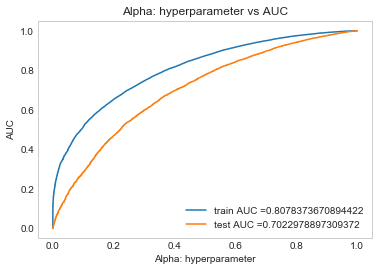

In [67]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam(Depth, Esimators, X_tr_BOW, X_te_BOW)

In [74]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

def Plot_Confusion_Matrix_Train_Test(Threshold_Values): 
    #Unpacking Tuple Values
    y_train_pred,y_test_pred,train_fpr,train_tpr,tr_thresholds,test_fpr,test_tpr,te_thresholds,Base_Model = Threshold_Values
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    CMTrain = confusion_matrix(y_train,predict_with_best_t(y_train_pred, best_t))
    plt.figure(figsize=(5.5,4))
    sns.heatmap(CMTrain, annot=True, fmt='d')
    plt.title('Confusion matrix for Train Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    CMTest = confusion_matrix(y_test,predict_with_best_t(y_test_pred, best_t))
    plt.figure(figsize=(5.5,4))
    sns.heatmap(CMTest, annot=True, fmt='d')
    plt.title('Confusion matrix for Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

the maximum value of tpr*(1-fpr) 0.5280486649722341 for threshold 0.505


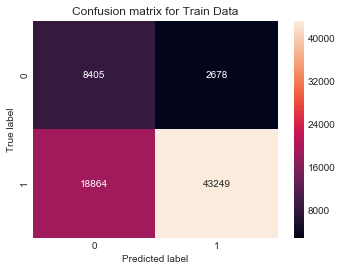

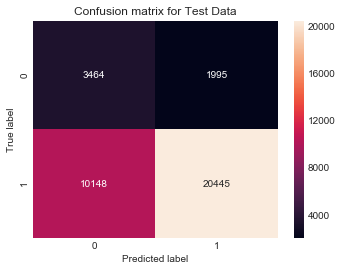

In [69]:
Plot_Confusion_Matrix_Train_Test(Threshold_Values)
y_train_pred,y_test_pred,train_fpr,train_tpr,tr_thresholds,test_fpr,test_tpr,te_thresholds,Base_Model = Threshold_Values

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [70]:
# Please write all the code with proper documentation
X_tr_TFIDF = hstack((X_train_essay_tfidf,X_train_project_tdidf,X_train_state_RC,X_train_teacher_RC, X_train_grade_RC,X_train_CC_RC,X_train_SC_RC,X_train_price_norm,X_train_previously_posted_norm)).tocsr()
X_te_TFIDF = hstack((X_test_essay_tfidf,X_test_project_tfidf,X_test_state_RC,X_test_teacher_RC,X_test_grade_RC,X_test_CC_RC,X_test_SC_RC, X_test_price_norm, X_test_previously_posted_norm)).tocsr()

              
print("Final Data matrix")
print(X_tr_TFIDF.shape, y_train.shape)
print(X_te_TFIDF.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 17476) (73196,)
(36052, 17476) (36052,)


In [71]:
X_tr_TFIDF.shape

(73196, 17476)

In [72]:
Base_Model = RandomForestClassifier(criterion='gini',class_weight='balanced')
parameters = [{'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100]}]
grid_search_TFIDF = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1, return_train_score= True)
grid_search_TFIDF = grid_search_TFIDF.fit(X_tr_TFIDF, y_train)

In [73]:
grid_search_TFIDF.best_params_

{'max_depth': 10, 'n_estimators': 100}

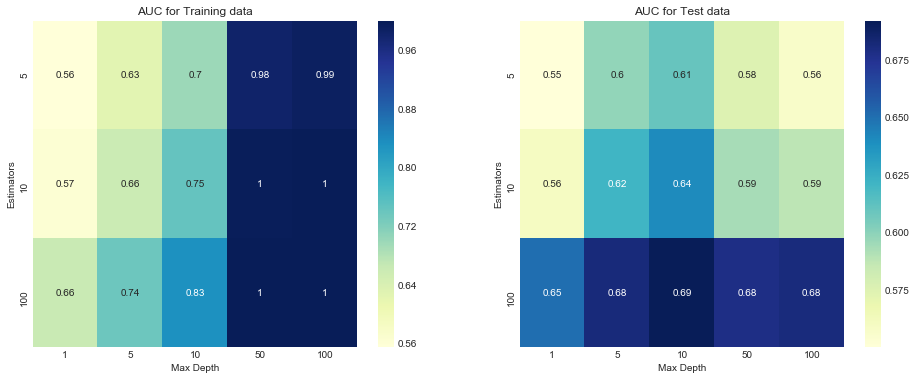

In [74]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_TFIDF)

In [75]:
#Chosen best hyper parameter from heat map
Depth =  10
Esimators = 100

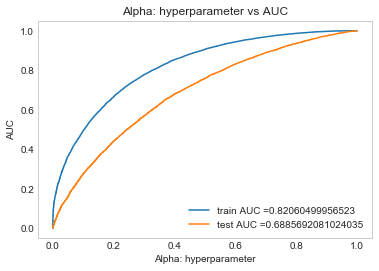

In [76]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam(Depth, Esimators, X_tr_TFIDF, X_te_TFIDF)

the maximum value of tpr*(1-fpr) 0.5470865758677215 for threshold 0.505


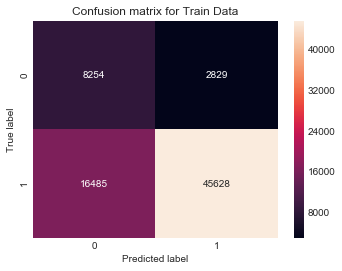

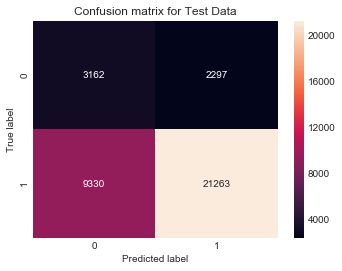

In [77]:
#Confusion matrix for Train and Test
Plot_Confusion_Matrix_Train_Test(Threshold_Values)


### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [78]:
# Please write all the code with proper documentation

X_train_avg_w2v = np.hstack((avg_w2v_vector_X_Train_essay,avg_w2v_vector_X_Train_Title,X_train_state_RC,X_train_teacher_RC, X_train_grade_RC,X_train_CC_RC,X_train_SC_RC,X_train_price_norm,X_train_previously_posted_norm))
X_te_avg_w2v = np.hstack((avg_w2v_vector_X_test_essay,avg_w2v_vector_X_test_Title,X_test_state_RC,X_test_teacher_RC,X_test_grade_RC,X_test_CC_RC,X_test_SC_RC, X_test_price_norm, X_test_previously_posted_norm))

In [79]:
print("Final Data matrix")
print(X_train_avg_w2v.shape, y_train.shape)
print(X_te_avg_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 612) (73196,)
(36052, 612) (36052,)


In [80]:
Base_Model = RandomForestClassifier(criterion='gini',class_weight='balanced')
parameters = [{'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100]}]
grid_search_avgw2v = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1,return_train_score= True)
grid_search_avgw2v = grid_search_avgw2v.fit(X_train_avg_w2v, y_train)


In [81]:
grid_search_avgw2v.best_params_

{'max_depth': 10, 'n_estimators': 100}

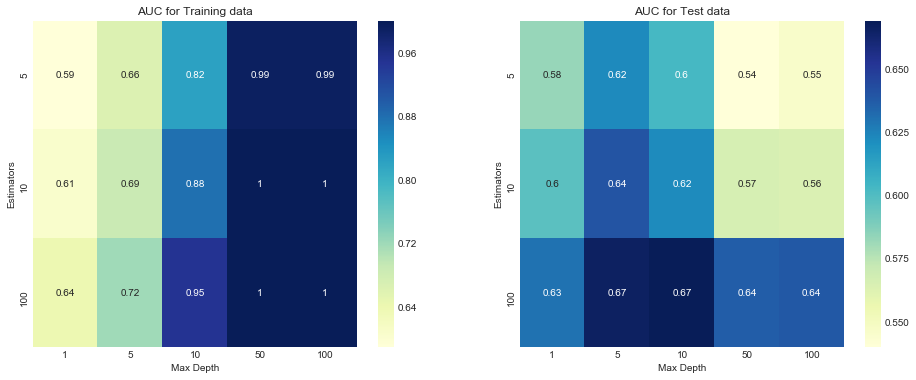

In [82]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_avgw2v)

In [118]:
#Chosen best hyper parameter from heat map
Depth =  5
Esimators = 100

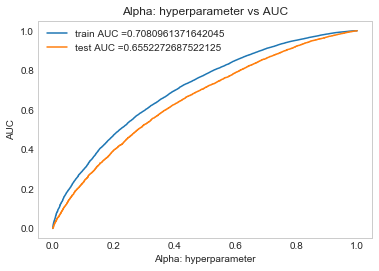

In [119]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam(Depth, Esimators, X_train_avg_w2v, X_te_avg_w2v)

the maximum value of tpr*(1-fpr) 0.42189351814263937 for threshold 0.502


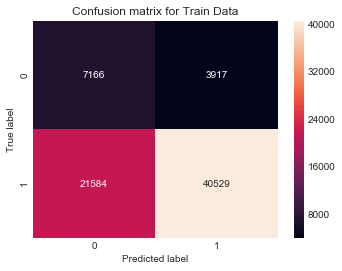

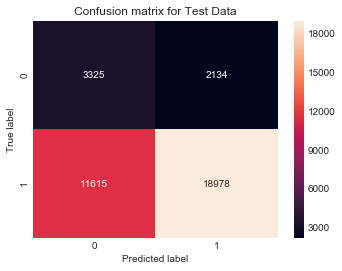

In [120]:
#Confusion matrix for Train and Test
Plot_Confusion_Matrix_Train_Test(Threshold_Values)

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [64]:
X_tr_tfidf_w2v = np.hstack((tfidf_w2v_vectors_X_train_essay,tfidf_w2v_vectors_X_train_title,X_train_state_RC,X_train_teacher_RC, X_train_grade_RC,X_train_CC_RC,X_train_SC_RC,X_train_price_norm,X_train_previously_posted_norm))
X_te_tfidf_w2v = np.hstack((tfidf_w2v_vectors_X_test_essay,tfidf_w2v_vectors_X_test_Title,X_test_state_RC,X_test_teacher_RC,X_test_grade_RC,X_test_CC_RC,X_test_SC_RC, X_test_price_norm, X_test_previously_posted_norm))              

print("Final Data matrix")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 612) (73196,)
(36052, 612) (36052,)


In [87]:
Base_Model = RandomForestClassifier(criterion='gini',class_weight='balanced')
parameters = [{'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100]}]
grid_search_tfidf_w2v = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1,return_train_score= True)
grid_search_tfidf_w2v = grid_search_tfidf_w2v.fit(X_tr_tfidf_w2v, y_train)

In [88]:
grid_search_tfidf_w2v.best_params_

{'max_depth': 10, 'n_estimators': 100}

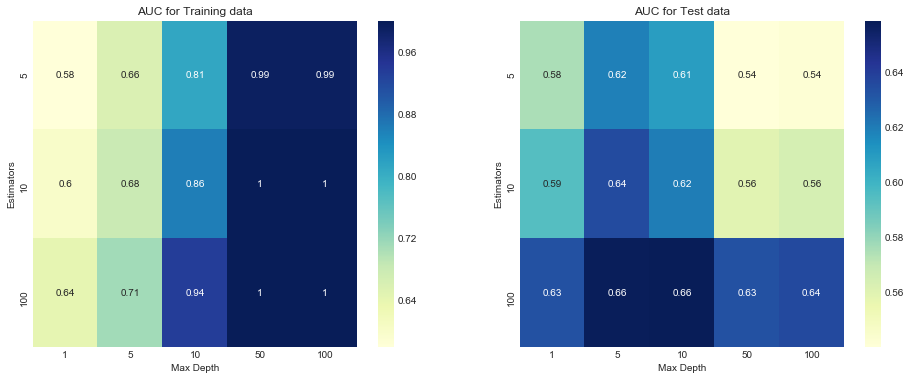

In [89]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_tfidf_w2v)

In [121]:
#Chosen best hyper parameter from heat map
Depth =  5
Esimators = 100

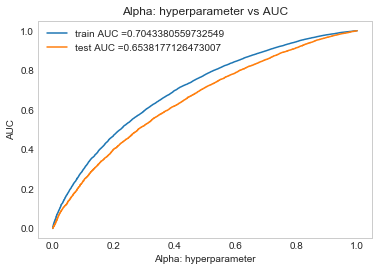

In [122]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam(Depth, Esimators, X_tr_tfidf_w2v, X_te_tfidf_w2v)

##### Confusion matrix for Train and Test
Plot_Confusion_Matrix_Train_Test(Threshold_Values)

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [58]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [94]:
Base_Model = xgb.XGBClassifier(criterion='gini',class_weight='balanced')
parameters = [{'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100]}]
grid_search_BOW_XG = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1, return_train_score= True)
grid_search_BOW_XG = grid_search_BOW_XG.fit(X_tr_BOW, y_train)

In [59]:
#Choosing the best hyperparameters which are obtained from grid search

def Chose_Best_Hyperparam_XG(Depth, No_Estimators, X_train, X_test):
    
    Base_Model = xgb.XGBClassifier(criterion='gini', max_depth=Depth, n_estimators=No_Estimators, class_weight='balanced')
    Base_Model.fit(X_train, y_train)
    y_train_pred = Base_Model.predict_proba(X_train)[:,1]    
    y_test_pred = Base_Model.predict_proba(X_test)[:,1]

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("hyperparameters Depth and N_estimator")
    plt.ylabel("AUC")
    plt.title("Alpha: hyperparameter vs AUC")
    plt.grid()
    plt.show()
    Output = (y_train_pred,y_test_pred,train_fpr,train_tpr,tr_thresholds,test_fpr,test_tpr,te_thresholds,Base_Model)
    return Output

In [96]:
grid_search_BOW_XG.best_params_

{'max_depth': 10, 'n_estimators': 100}

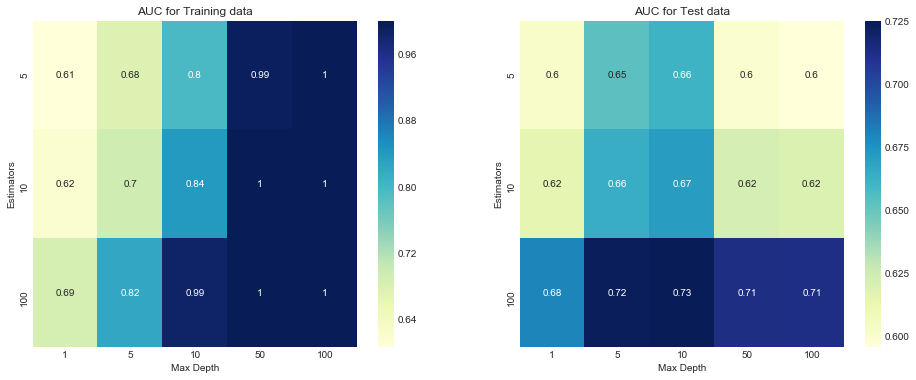

In [97]:
Plot_Heatmap(grid_search_BOW_XG)


In [124]:
#Chosen best hyper parameter from heat map
Depth =  5
Esimators = 100

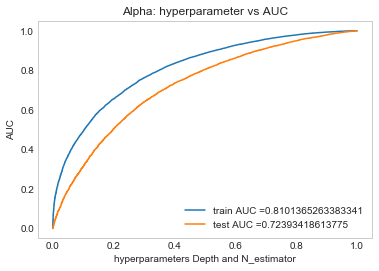

In [125]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam_XG(Depth, Esimators, X_tr_BOW, X_te_BOW)

the maximum value of tpr*(1-fpr) 0.5365295855817231 for threshold 0.826


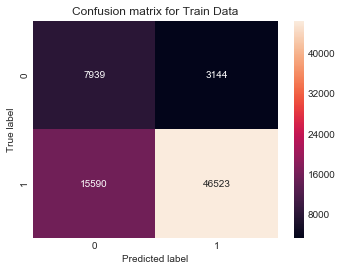

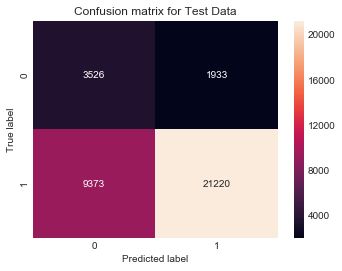

In [126]:
Plot_Confusion_Matrix_Train_Test(Threshold_Values)

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [111]:
Base_Model =  xgb.XGBClassifier(criterion='gini',class_weight='balanced')
parameters = [{'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100]}]
grid_search_TFIDF_XG = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1, return_train_score= True)
grid_search_TFIDF_XG = grid_search_TFIDF_XG.fit(X_tr_TFIDF, y_train)

In [112]:
grid_search_TFIDF_XG.best_params_

{'max_depth': 10, 'n_estimators': 100}

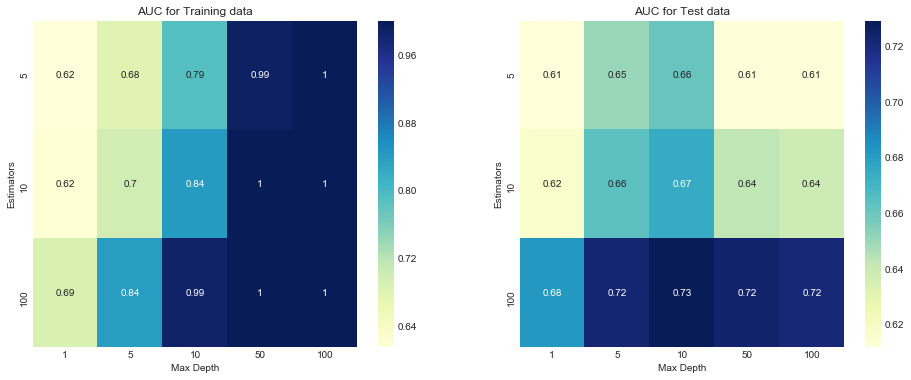

In [113]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_TFIDF_XG)

In [127]:
#Chosen best hyper parameter from heat map
Depth =  5
Esimators = 100

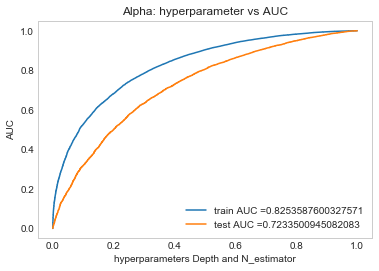

In [128]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam_XG(Depth, Esimators, X_tr_TFIDF, X_te_TFIDF)

the maximum value of tpr*(1-fpr) 0.5571854433434104 for threshold 0.834


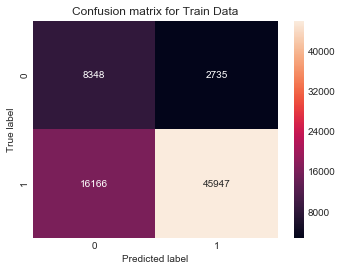

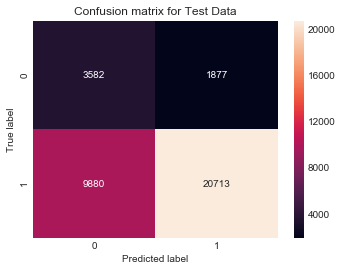

In [129]:
#Confusion matrix for Train and Test
Plot_Confusion_Matrix_Train_Test(Threshold_Values)

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
Base_Model = xgb.XGBClassifier(criterion='gini',class_weight='balanced')
parameters = [{'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100]}]
grid_search_avgw2v_XG = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1,return_train_score= True)
grid_search_avgw2v_XG = grid_search_avgw2v_XG.fit(X_train_avg_w2v, y_train)


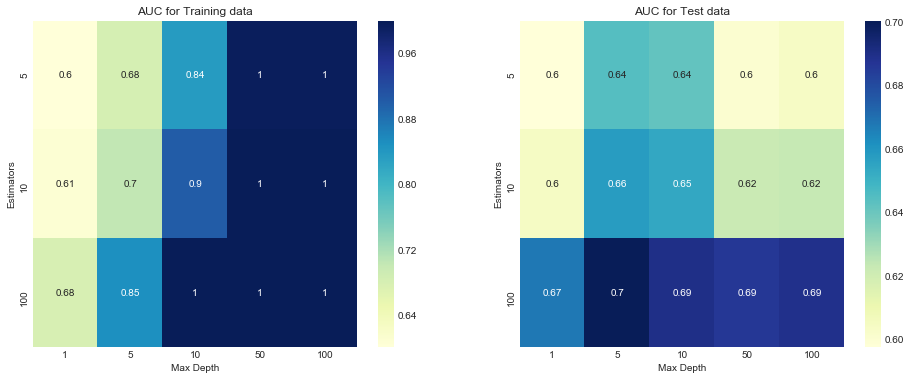

In [131]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_avgw2v_XG)

In [132]:
#Chosen best hyper parameter from heat map
Depth =  5
Esimators = 100

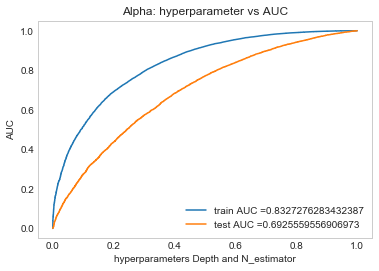

In [133]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam_XG(Depth, Esimators, X_train_avg_w2v, X_te_avg_w2v)

the maximum value of tpr*(1-fpr) 0.5594975435001714 for threshold 0.831


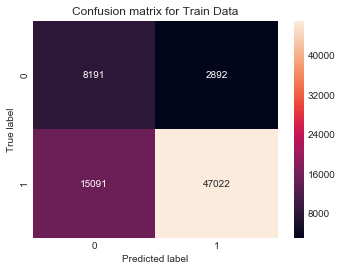

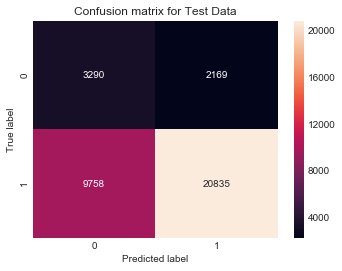

In [134]:
#Confusion matrix for Train and Test
Plot_Confusion_Matrix_Train_Test(Threshold_Values)

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [65]:
Base_Model = xgb.XGBClassifier(criterion='gini',class_weight='balanced')
parameters = [{'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100]}]
grid_search_tfidf_w2v_XG = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1,return_train_score= True)
grid_search_tfidf_w2v_XG = grid_search_tfidf_w2v_XG.fit(X_tr_tfidf_w2v, y_train)


In [66]:
grid_search_tfidf_w2v_XG.best_params_

{'max_depth': 5, 'n_estimators': 100}

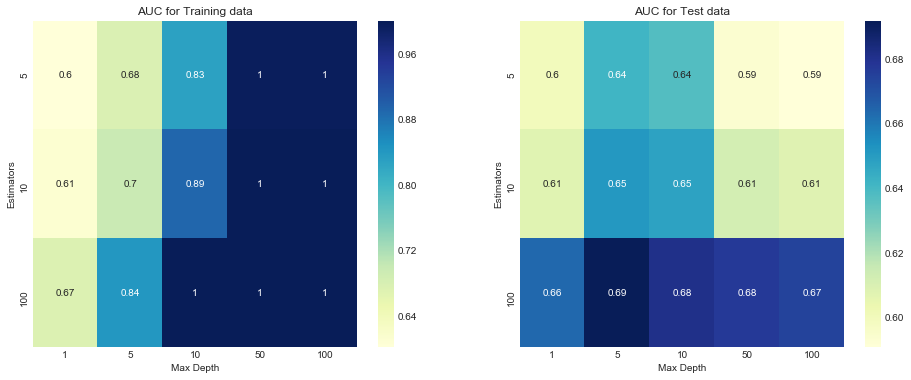

In [67]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_tfidf_w2v_XG)

In [70]:
#Chosen best hyper parameter from heat map
Depth =  5
Esimators = 100

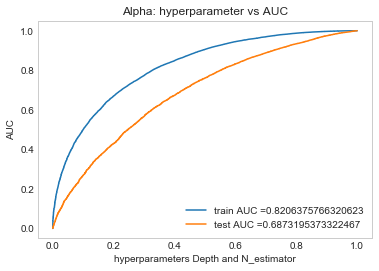

In [71]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam_XG(Depth, Esimators, X_tr_tfidf_w2v, X_te_tfidf_w2v)


the maximum value of tpr*(1-fpr) 0.5455404740283387 for threshold 0.833


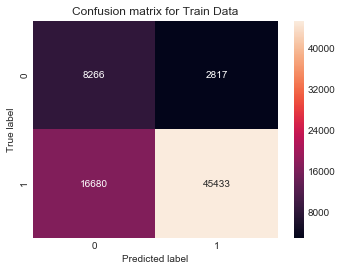

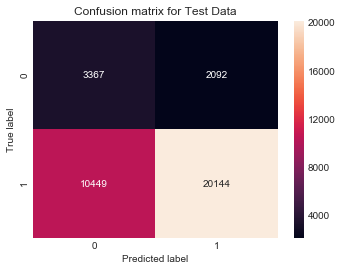

In [75]:
#Confusion matrix for Train and Test
Plot_Confusion_Matrix_Train_Test(Threshold_Values)

<h1>3. Conclusion</h1>

In [76]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","max_depth","n_esimators", "AUC"]
x.add_row(["BOW", "RF", 10, 100 ,0.7])
x.add_row(["TFIDF","RF", 10, 100, 0.69])
x.add_row(["avgw2v","RF", 5, 100, 0.66])
x.add_row(["tfidf_w2v","RF", 5, 100, 0.65])
x.add_row(["BOW", "GBDT", 5,100,0.72])
x.add_row(["TFIDF","GBDT", 5, 100, 0.72])
x.add_row(["avgw2v","GBDT", 5, 100, 0.69])
x.add_row(["tfidf_w2v","GBDT",  5, 100, 0.69])
print(x)

+------------+-------+-----------+-------------+------+
| Vectorizer | Model | max_depth | n_esimators | AUC  |
+------------+-------+-----------+-------------+------+
|    BOW     |   RF  |     10    |     100     | 0.7  |
|   TFIDF    |   RF  |     10    |     100     | 0.69 |
|   avgw2v   |   RF  |     5     |     100     | 0.66 |
| tfidf_w2v  |   RF  |     5     |     100     | 0.65 |
|    BOW     |  GBDT |     5     |     100     | 0.72 |
|   TFIDF    |  GBDT |     5     |     100     | 0.72 |
|   avgw2v   |  GBDT |     5     |     100     | 0.69 |
| tfidf_w2v  |  GBDT |     5     |     100     | 0.69 |
+------------+-------+-----------+-------------+------+


### Summary

For the given dataset XGBClassifier works well(Based on AUC Scores)compared to RF 